## Code to generate figure for ASpop

## Install and import libraries

In [61]:
%pip install requests pandas seaborn matplotlib

import requests
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

# warnings
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


## Global settings

In [62]:
hra_pop_version = 'v1.0'
branch = 'main'

output_folder = 'output'

## Get data

In [63]:
# could also use https://apps.humanatlas.io/api/grlc/hra-pop.html#get-/cell-types-in-atlas
url = f"https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/atlas-ad-hoc/cell-types-in-anatomical-structurescts-per-as.csv"

headers = {
    'Accept': 'text/csv'
}

data = requests.get(url=url, headers=headers).text

df_as = pd.read_csv(StringIO(data))
df_as

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,0.147653,3
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3
...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1
8892,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1
8893,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1
8894,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1


## Preprocess

In [64]:
# get nunique() cell_label by tool per as_label by sex
new_df = (
    df_as.groupby(['tool', 'as_label', 'sex','organ'])["cell_label"]
      .nunique()
      .reset_index(name='n_unique_cell_label')
)
new_df['organ'] = new_df['organ'].str.lower()
new_df

,tool,as_label,sex,organ,n_unique_cell_label
0,azimuth,Cartilage of segmental bronchus,Female,lung,35
1,azimuth,Cartilage of segmental bronchus,Male,lung,28
2,azimuth,Lateral segmental bronchus,Female,lung,29
3,azimuth,Lateral segmental bronchus,Male,lung,28
4,azimuth,Left Medial Basal Bronchopulmonary Segment,Male,lung,29
...,...,...,...,...,...
251,sc_proteomics,sigmoid colon,Male,large intestine,22
252,sc_proteomics,skin,Female,skin,8
253,sc_proteomics,skin,Male,skin,8
254,sc_proteomics,transverse colon,Female,large intestine,22


In [65]:
# add organ label to AS label
new_df['organ_as_label'] = new_df['organ'] + ' - ' + new_df['as_label']

new_df['organ_as_label'] = pd.Categorical(
    new_df['organ_as_label'],
    categories=sorted(new_df["organ_as_label"].unique()),
    ordered=True
    )

# new_df['organ_as_label'] = new_df['organ_as_label'].str.lower()
new_df

,tool,as_label,sex,organ,n_unique_cell_label,organ_as_label
0,azimuth,Cartilage of segmental bronchus,Female,lung,35,lung - Cartilage of segmental bronchus
1,azimuth,Cartilage of segmental bronchus,Male,lung,28,lung - Cartilage of segmental bronchus
2,azimuth,Lateral segmental bronchus,Female,lung,29,lung - Lateral segmental bronchus
3,azimuth,Lateral segmental bronchus,Male,lung,28,lung - Lateral segmental bronchus
4,azimuth,Left Medial Basal Bronchopulmonary Segment,Male,lung,29,lung - Left Medial Basal Bronchopulmonary Segment
...,...,...,...,...,...,...
251,sc_proteomics,sigmoid colon,Male,large intestine,22,large intestine - sigmoid colon
252,sc_proteomics,skin,Female,skin,8,skin - skin
253,sc_proteomics,skin,Male,skin,8,skin - skin
254,sc_proteomics,transverse colon,Female,large intestine,22,large intestine - transverse colon


## Visualize

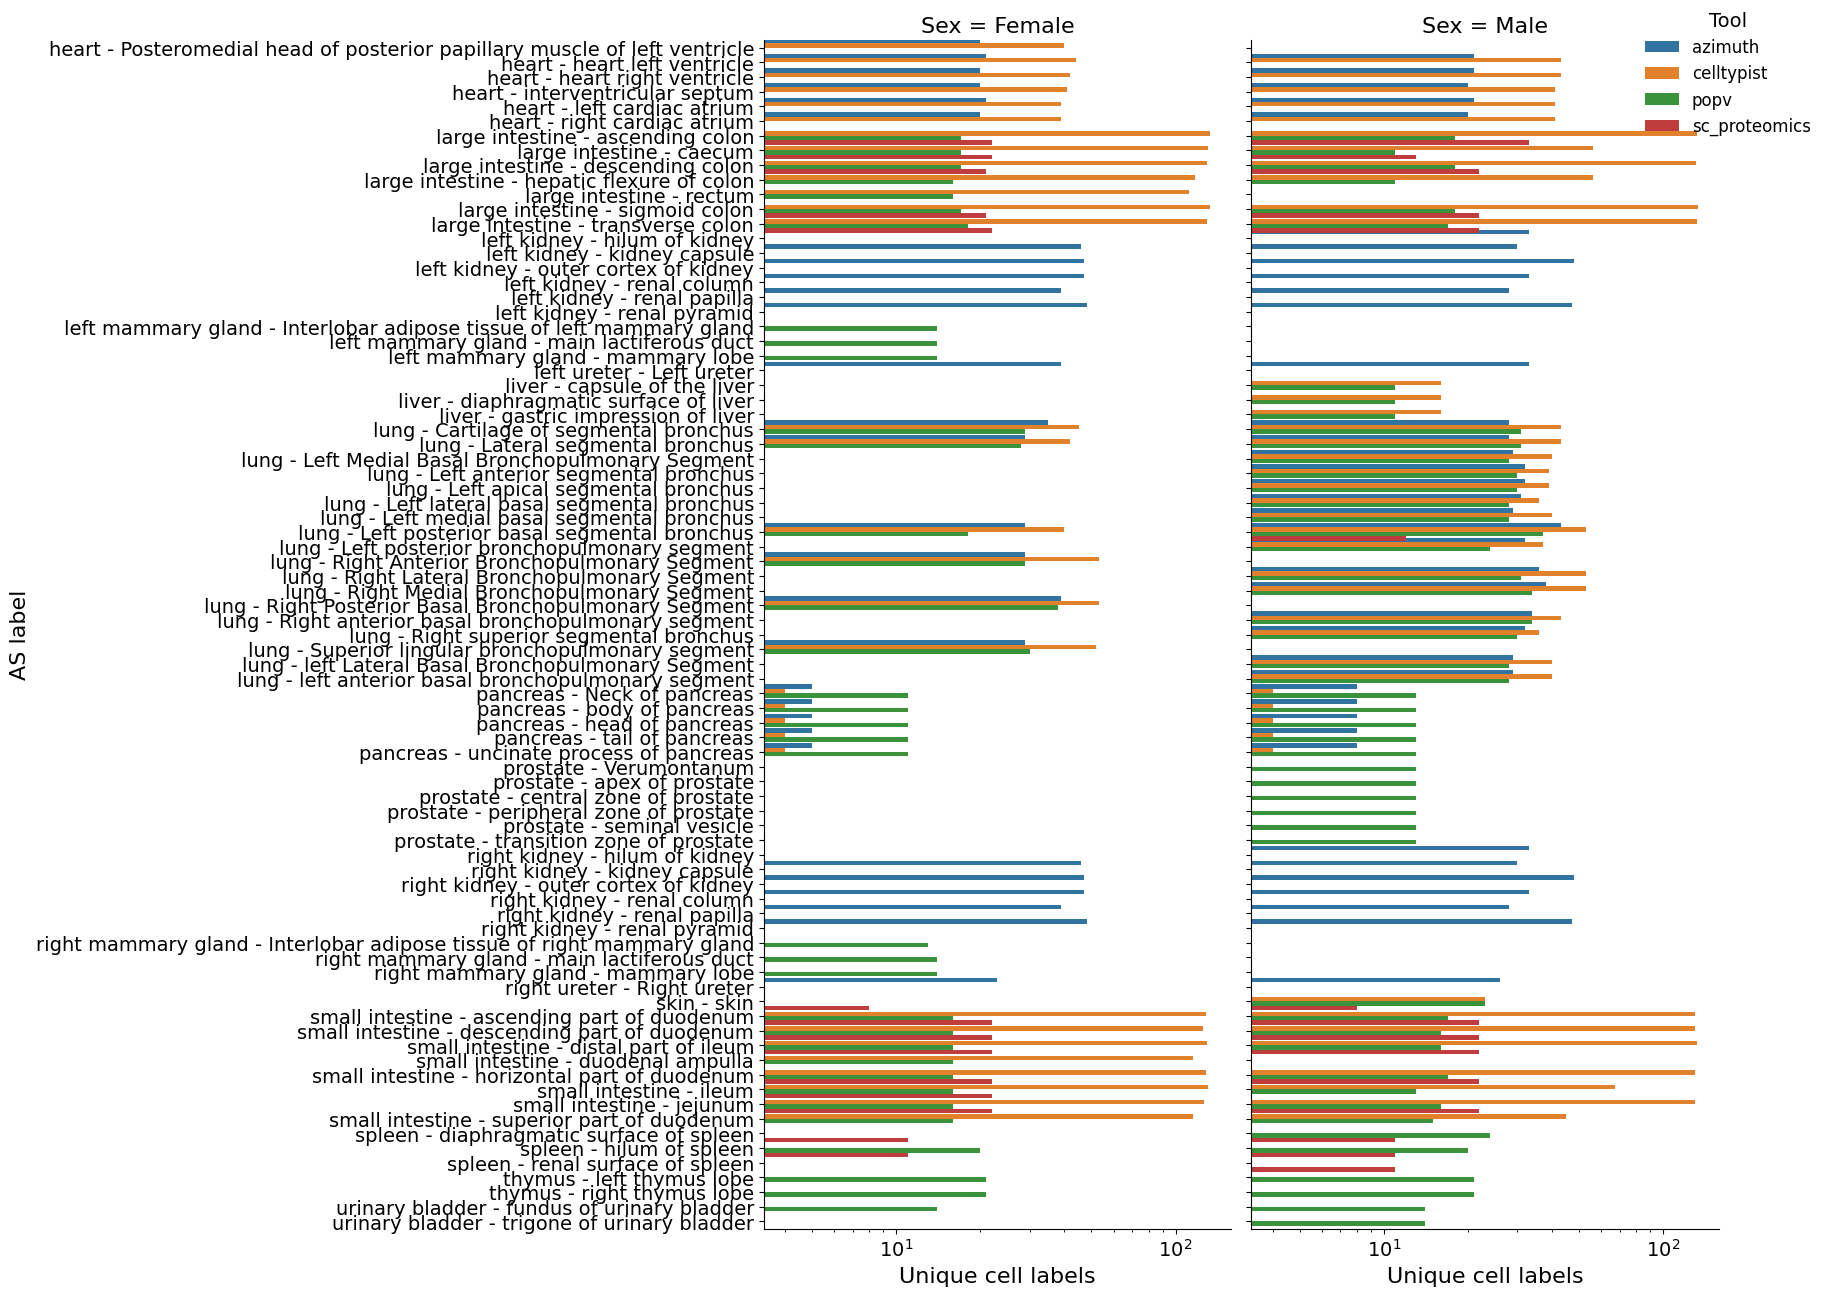

In [66]:
rc_params = {
    "figure.figsize": (12, 12),
    "axes.titlesize": 18,    # subplot titles
    "axes.labelsize": 16,    # x/y labels
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.title_fontsize": 14,
    "legend.fontsize": 12
}
plt.rcParams.update(rc_params)

# Split by sex in separate facets
g = sns.catplot(
    data=new_df,
    kind="bar",
    y="organ_as_label",
    x="n_unique_cell_label",
    hue="tool",
    col="sex",
    orient="h",
    height=13,
    aspect=.6,
    width=1.2
)

# Move legend to top right
g._legend.set_title("Tool")
g._legend.set_bbox_to_anchor((1.05, 1))  # move outside
g._legend.set_loc("upper right")

g.set_axis_labels("Unique cell labels", "AS label")
g.set_titles("Sex = {col_name}")
plt.xscale('log')
plt.tight_layout()
plt.show()